In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("cities_r2.csv")

In [3]:
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [4]:
#Checking for missing values
df.isnull().sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

In [5]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [6]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,0,3,22,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,455,16287,8612,7675
1,1,27,14,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,154,8863,5269,3594
2,2,28,1,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,116,10565,6797,3768
3,3,20,10,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,215,19225,12189,7036
4,4,28,1,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,66,11902,7871,4031


In [7]:
#Selecting feature for clustering

In [8]:
X = df[['effective_literacy_rate_total']]

In [10]:
#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
from sklearn.cluster import KMeans

In [10]:
#Elbow method
inertia = []
k_range = range(1,11)

for k in k_range:
    km = KMeans(n_clusters=k,random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)

C:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\HP\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [11]:
import matplotlib.pyplot as plt

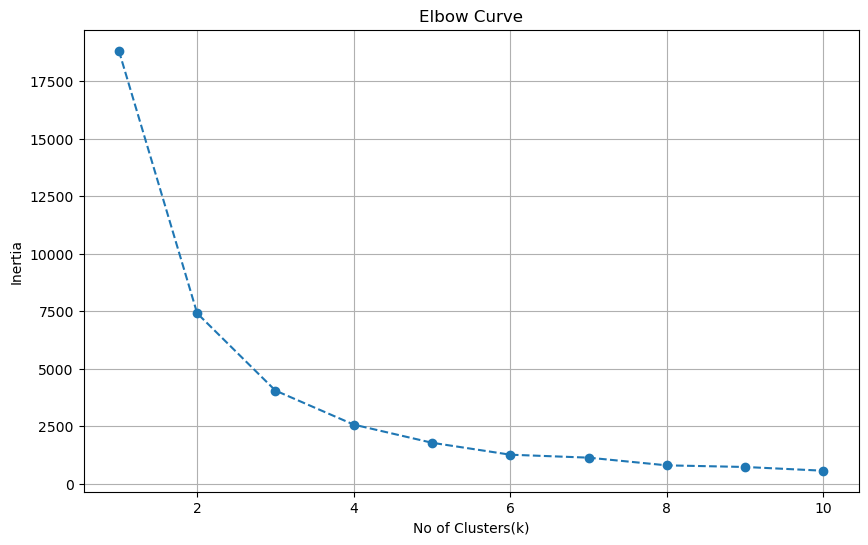

<Figure size 640x480 with 0 Axes>

In [18]:
#Plotting the Elbow Curve
plt.figure(figsize=(10,6))
plt.plot(k_range,inertia,marker='o',linestyle='--')
plt.title('Elbow Curve')
plt.xlabel('No of Clusters(k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
plt.savefig("elbow_curve_2.png")

In [19]:
#Choosing k = 3
kmeans = KMeans(n_clusters=4,random_state=0)
df['cluster'] = kmeans.fit_predict(X)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [20]:
#Visualization
centers = kmeans.cluster_centers_
sorted_centers = np.sort(centers,axis=0)
sorted_centers

array([[70.62342857],
       [79.95216216],
       [85.79594737],
       [91.2233758 ]])

In [21]:
import seaborn as sns

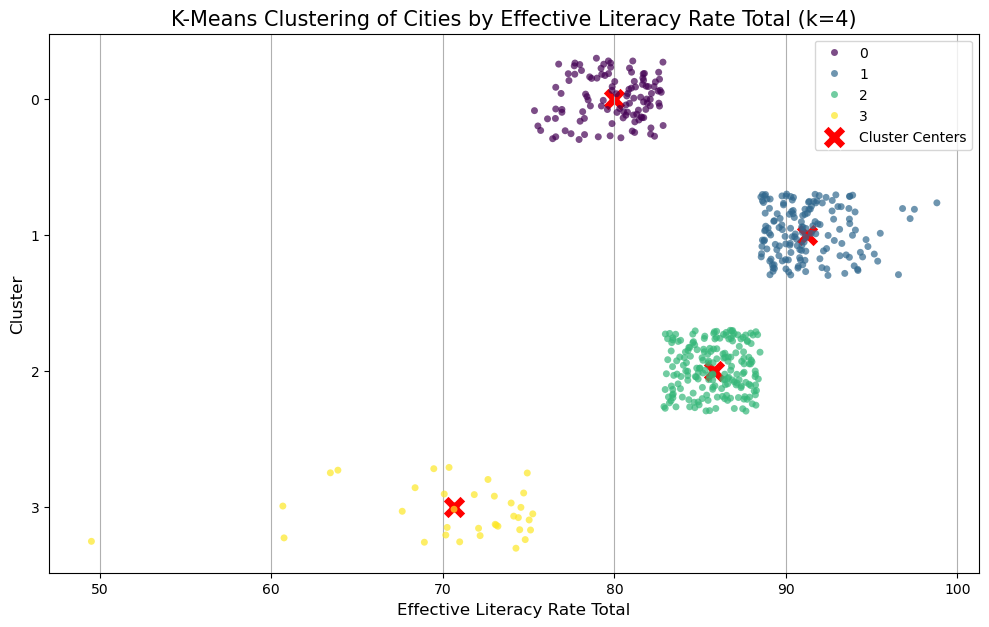

In [22]:
plt.figure(figsize=(12,7))
sns.stripplot(x='effective_literacy_rate_total', y='cluster', data=df,
              palette='viridis', hue='cluster', jitter=0.3, alpha=0.7, orient='h')

center_df = pd.DataFrame({'cluster': range(4), 'center': centers.flatten()})
sns.scatterplot(x='center', y='cluster', data=center_df,
                color='red', marker='X', s=300, label='Cluster Centers')

plt.title('K-Means Clustering of Cities by Effective Literacy Rate Total (k=4)', fontsize=15)
plt.xlabel('Effective Literacy Rate Total', fontsize=12)
plt.ylabel('Cluster', fontsize=12)
plt.yticks(ticks=range(4))
plt.legend()
plt.grid(axis='x')
plt.savefig('kmeans_cluster_plot_2.png')

In [23]:
print(df['cluster'].value_counts().sort_index())

cluster
0    111
1    156
2    191
3     35
Name: count, dtype: int64
